# **Natural Language Processing**

Machine Learning models, and more broadly Artificial Intelligence applications, are built using ***data***. Traditionally when we think of the data used for machine learning processes, we think of tabular data and/or image data. But as humans, our natural form of communication isn't through tabular data or image data. Our brains can see images, but we use ***words*** to describe these images--not numbers. These ***words*** make up the natural languages--the method of communication for humans.  As computers are now becoming engrained in our lives, the ability to interact with techonology is becoming ever-so-important. ***Natural Language Processing (NLP)*** is the branch of artificial intelligence that concerns with the interaction between computers and humans through the means of natural language.


# **Sentiment Analysis**

**Sentiment Analysis** is an application of NLP, which refers to interpreting and classifying emotions in text-data using various text analysis methods.

Here I made a simple ***Sentiment Analysis*** tool, which scraps headlines from **NYT** and **Reuters**--based on the search query inputted by the user--and then using pre-trained classifiers outputs a 'Sentiment Score' for each headline. In an age where media is polarized, the objective of this small-scale project was to see if the two news-sources have a pro- or anti- bias for the topic of interest.

This small-scale project was a means of learning and exploring the various NLP methods and tools.

# **Import Libraries**

In [0]:
# Common Libraries
import numpy as np
from numpy import dot
from numpy.linalg import norm
import pandas as pd
import matplotlib.pyplot as plt
import re as re
import time
%matplotlib inline

# NLP Libraries
from textblob import TextBlob
import nltk
from nltk import *
from nltk.text import Text
import gensim as gn

# Scrapping Libraries
import requests
from bs4 import BeautifulSoup

# **Get Topic From User**

In [108]:
inp = input('Enter topic you want to search:')
inp = re.sub(' ', '+', inp)

Enter topic you want to search:bernie


# **Get the Headlines from the Two Sites**

Scrapping the news headlines of NYT and Reuters using BeautifulSoap

In [0]:
nytu = 'https://www.nytimes.com/search?query=' + inp
nytuparent = 'https://www.nytimes.com'
pge = requests.get(nytu)
soup = BeautifulSoup(pge.content, 'html.parser')
wl = soup.findAll('div', attrs={'class':'css-e1lvw9'})
headlines = []
links = []
for a in wl:
  hl = a.find('h4', attrs={'class':'css-2fgx4k'})
  link = a.find('a')
  headlines.append(hl.get_text())
  link = nytuparent + link.get('href')
  links.append(link)
nytpd = pd.DataFrame({'Headlines' : headlines, 'Links' : links})

In [0]:
ru = 'https://www.reuters.com/search/news?blob=' + inp
ruparent = 'https://www.reuters.com'
pge = requests.get(ru)
soup = BeautifulSoup(pge.content, 'html.parser')
wl1 = soup.findAll('div', attrs={'class':'search-result-content'})
headlines = []
links = []
for a in wl1:
  hl = a.find('h3', attrs={'class':'search-result-title'})
  link = a.find('a')
  link = ruparent + link.get('href')
  headlines.append(hl.get_text())
  links.append(link)
reutpd = pd.DataFrame({'Headlines' : headlines, 'Links' : links})

In [111]:
nytpd.head(5)

,Headlines,Links
0,Former Aides to Bernie Sanders Form a Super PA...,https://www.nytimes.com/2020/04/28/us/politics...
1,"In Bid for Party Unity, Biden Moves Beyond Res...",https://www.nytimes.com/2020/05/13/us/politics...
2,These Young Socialists Think They Have Courage...,https://www.nytimes.com/2020/05/13/opinion/soc...
3,"Biden and Bernie, Bros",https://www.nytimes.com/2020/04/13/us/politics...
4,Bernie’s Endorsement Matters,https://www.nytimes.com/2020/04/14/opinion/ber...


In [112]:
reutpd.head(5)

,Headlines,Links
0,Breakingviews - Cox: Who’s afraid of a Preside...,https://www.reuters.com/article/us-usa-politic...
1,Battleground Michigan seen as last stand for B...,https://www.reuters.com/article/idUSKBN20V0DS
2,Bernie Sanders cancels Cleveland rally over co...,https://www.reuters.com/article/idUSW1N2AO00T
3,Bernie Sanders cancels Cleveland rally over co...,https://www.reuters.com/article/idUSKBN20X2ZA
4,False claim: Photo shows Bernie Sanders at 196...,https://www.reuters.com/article/idUSKCN20K1PH


# **Build Classifier**

In [113]:
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [0]:
def sentiment(data):
  senti = SentimentIntensityAnalyzer();
  hl = data['Headlines'].values
  n = len(hl)
  Score = []

  for i in range(0, n, 1):
    s = senti.polarity_scores(hl[i])
    Score.append(s['compound'])
  return Score

In [0]:
def sentiment2(data):
  hl = data['Headlines'].values
  n = len(hl)
  Score = []

  for i in range(0, n, 1):
    s = TextBlob(hl[i])
    Score.append(s.sentiment.polarity)
  return Score

In [0]:
def comment(data):
  avg = data['Average Score'].values; num = len(avg)
  comment = []; p = 'Positive'; n = 'Negative'; neu = 'Neutral';
  
  for i in range(0, num, 1):
    if avg[i] > 0.05: 
      comment.append(p)
    elif (-0.05 <= avg[i] <= 0.05):
      comment.append(neu)
    else:
      comment.append(n)
  return comment

In [0]:
nytScore = sentiment(nytpd); nytpd.insert(1,"NLTK_Score",nytScore)
reutScore = sentiment(reutpd); reutpd.insert(1,"NLTK_Score",reutScore)

nytScore2 = sentiment2(nytpd); nytpd.insert(2,"TextBlob_Score",nytScore2)
reutScore2 = sentiment2(reutpd); reutpd.insert(2,"TextBlob_Score",reutScore2)

In [0]:
nytpd.insert(3,'Average Score', (nytpd.NLTK_Score+nytpd.TextBlob_Score)/2)
reutpd.insert(3,'Average Score', (reutpd.NLTK_Score+reutpd.TextBlob_Score)/2)

In [0]:
nytcmt = comment(nytpd); nytpd.insert(4, 'Review', nytcmt)
reutcmt = comment(reutpd); reutpd.insert(4, 'Review', reutcmt)

# **Results**

In [121]:
nytpd

,Headlines,NLTK_Score,TextBlob_Score,Average Score,Review,Links
0,Former Aides to Bernie Sanders Form a Super PA...,0.7650,0.166667,0.465833,Positive,https://www.nytimes.com/2020/04/28/us/politics...
1,"In Bid for Party Unity, Biden Moves Beyond Res...",0.5994,0.000000,0.299700,Positive,https://www.nytimes.com/2020/05/13/us/politics...
2,These Young Socialists Think They Have Courage...,0.4939,0.100000,0.296950,Positive,https://www.nytimes.com/2020/05/13/opinion/soc...
3,"Biden and Bernie, Bros",0.0000,0.000000,0.000000,Neutral,https://www.nytimes.com/2020/04/13/us/politics...
4,Bernie’s Endorsement Matters,0.3400,0.000000,0.170000,Positive,https://www.nytimes.com/2020/04/14/opinion/ber...
5,New York Must Hold Democratic Presidential Pri...,0.0000,0.268182,0.134091,Positive,https://www.nytimes.com/2020/05/05/us/politics...
6,Will We Face Depression-Era Job Losses? Let’s ...,-0.4019,0.000000,-0.200950,Negative,https://www.nytimes.com/2020/05/09/opinion/fed...
7,The Democratic Establishment Suddenly Loves Be...,0.5719,0.000000,0.285950,Positive,https://www.nytimes.com/2020/04/16/us/politics...
8,New York Board of Elections Cancels Democratic...,-0.2263,0.268182,0.020941,Neutral,https://www.nytimes.com/2020/04/27/us/politics...
9,Bernie Sanders Drops Out,0.0000,0.000000,0.000000,Neutral,https://www.nytimes.com/2020/04/08/podcasts/th...


In [122]:
reutpd

,Headlines,NLTK_Score,TextBlob_Score,Average Score,Review,Links
0,Breakingviews - Cox: Who’s afraid of a Preside...,0.0000,-0.6,-0.30000,Negative,https://www.reuters.com/article/us-usa-politic...
1,Battleground Michigan seen as last stand for B...,-0.4019,0.0,-0.20095,Negative,https://www.reuters.com/article/idUSKBN20V0DS
2,Bernie Sanders cancels Cleveland rally over co...,-0.2263,0.0,-0.11315,Negative,https://www.reuters.com/article/idUSW1N2AO00T
3,Bernie Sanders cancels Cleveland rally over co...,-0.2263,0.0,-0.11315,Negative,https://www.reuters.com/article/idUSKBN20X2ZA
4,False claim: Photo shows Bernie Sanders at 196...,-0.5106,-0.4,-0.45530,Negative,https://www.reuters.com/article/idUSKCN20K1PH
5,'Nobody likes him': Hillary Clinton bashes Ber...,0.4215,0.0,0.21075,Positive,https://www.reuters.com/article/idUSKBN1ZK233
6,UPDATE 2-'Nobody likes him' - Hillary Clinton ...,0.4215,0.0,0.21075,Positive,https://www.reuters.com/article/idUSL1N29Q0WK
7,"After feud with Warren, Bernie Sanders release...",-0.3400,0.0,-0.17000,Negative,https://www.reuters.com/article/idUSL1N29M10V
8,'Nobody likes him' - Hillary Clinton bashes Be...,0.4215,0.0,0.21075,Positive,https://www.reuters.com/article/idUSL1N29Q0LM
9,Breakingviews - Bernie Sanders may yet get his...,0.2500,0.0,0.12500,Positive,https://www.reuters.com/article/idUSKCN21Q31A


# **Some Thoughts**

From this primitive sentiment analysis, we can see that NYT headlines are more opinionated than Reuters'. But one thing to consider here is that, this indeed is a very ***primitive*** sentiment analysis. We used two *pre-trained* models-NLTK's Vader Sentiment Analyzer and TextBlob--to give us a sentiment score, which we then averaged to give us our final score. Both of these pre-trained models use a Bag-Of-Words approach in which each word in a sentence has a sentiment-score, and the final sentence/text sentiment score is a function of these individuals scores. These models try, but are not great at understanding context. With these, among other, considerations in mind--it would be inappropriate to use these tools to make any final judgements.

Word-Embeddings, such as Word2Vec and GloVE, do a much better job of understanding context--and are currently the standard.

# **Further Exploration**

Here we explore some other methods, which maybe helpful in identifying bias.

## Getting Reuters Articles

In [0]:
reuhls = reutpd["Headlines"].values
reulinks = reutpd["Links"].values

In [0]:
pge = requests.get(reulinks[1])
soup = BeautifulSoup(pge.content, 'html.parser')
t = soup.find('div', attrs={'class':'StandardArticleBody_body'})

In [163]:
text = []
for l in reulinks:
  print(l)
  pge = requests.get(l)
  soup = BeautifulSoup(pge.content, 'html.parser')
  t = soup.find('div', attrs={'class':'StandardArticleBody_body'})
  text.append(t.text)

https://www.reuters.com/article/us-usa-politics-sanders-breakingviews/breakingviews-cox-whos-afraid-of-a-president-bernie-sanders-idUSKBN1ZX20B
https://www.reuters.com/article/idUSKBN20V0DS
https://www.reuters.com/article/idUSW1N2AO00T
https://www.reuters.com/article/idUSKBN20X2ZA
https://www.reuters.com/article/idUSKCN20K1PH
https://www.reuters.com/article/idUSKBN1ZK233
https://www.reuters.com/article/idUSL1N29Q0WK
https://www.reuters.com/article/idUSL1N29M10V
https://www.reuters.com/article/idUSL1N29Q0LM
https://www.reuters.com/article/idUSKCN21Q31A


## Preprocessing Text

When performing text-analysis, its common practice to remove punctuations and make all text lower-case. Punctuations and letter-case do not offer much context to machines, as they do to humans.

In [0]:
def cleantext(t):
    t = t.lower()
    t = re.sub(r"[^A-Za-z0-9^,!?.\/'+]", " ", t)
    t = re.sub(r"\+", " plus ", t)
    t = re.sub(r",", " ", t)
    t = re.sub(r"\.", " ", t)
    t = re.sub(r"!", " ! ", t)
    t = re.sub(r"\?", " ? ", t)
    t = re.sub(r"'", " ", t)
    t = re.sub(r":", " : ", t)
    t = re.sub(r"\s{2,}", " ", t)
    return t

In [0]:
for i in range(0, len(text)):
  text[i] = cleantext(text[i])

In [166]:
text[6]

'washington reuters hillary clinton criticized the campaign of her former democratic presidential rival bernie sanders in a new documentary in which she says he was an ineffective u s senator who accomplished little because nobody liked him clinton also weighed in on the dispute between sanders and 2020 democratic presidential rival elizabeth warren centering around the electability of women saying sanders demonstrated a pattern in how his campaign attacked women rivals the criticism made in a hulu documentary to be shown at the sundance film festival on saturday and an interview promoting it revealed lingering bitterness toward sanders after he mounted an unexpected democratic primary challenge to clinton in 2016 clinton backers blame sanders supporters for tarnishing her with vitriolic criticism that helped put republican donald trump in the white house he was in congress for years he had one senator support him nobody likes him nobody wants to work with him he got nothing done he wa

In [167]:
nltk.download("gutenberg")
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package gutenberg to /root/nltk_data...
[nltk_data]   Package gutenberg is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

## Tokenizing

Text-analysis is typically conducted using ***tokens***--which is a representation of a piece of text as an array of words. Its also advised to remove any 'stopwords'--these are common words, such as pronound, which do not offer much meaning to a piece of text as a whole. This piece of code below, tokenizes a given piece of text--a Reuters article in our case--and remoives stopwords, using tools from the NLTK library.

In [0]:
def insttext(textarray):
  tokens = nltk.tokenize.word_tokenize(textarray)
  t1 = Text(tokens)
  return t1

In [0]:
t1 = insttext(text[6])

## Dispersion Plot

A ***Dispersion Plot***, shows the occurances of a particular word in a given article. We can use a dispersion plot to make some initial claims about a given article. For example, we are analyzing an article about **Bernie Sanders**, we can use the dispersion plot to plot the occurances of 'socialist' and/or 'communist' in the article; if the latter word is sprinkled all over the article, we may conclude that the article aims to cast a bad represantion of the senator.

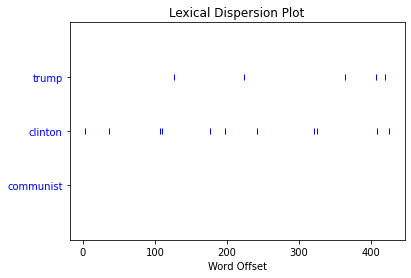

In [170]:
t1.dispersion_plot(['trump', 'clinton', 'communist'])

# **Final Thoughts**

As mentioned earlier, this was an introductory project to get my hands dirty with some Natural Language Processing. NLP is a growing field with many applications. Though I did not get the chance to get into word-embeddings in this project, there are upcoming projects that I will publish soon in the same repository.

# ***Thank You***